In [ ]:
#https://www.kaggle.com/uciml/autompg-dataset

# Loading the Data & preparing the data 

In [42]:
# importing needed libraries

import sklearn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import datetime

In [7]:
# displaying the data

automobile_data = pd.read_csv('automobiles/auto-mpg.csv')
automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
364,26.6,8,350.0,105,3725,19.0,81,1,oldsmobile cutlass ls
145,32.0,4,83.0,61,2003,19.0,74,3,datsun 710
283,20.2,6,232.0,90,3265,18.2,79,1,amc concord dl 6
156,16.0,8,400.0,170,4668,11.5,75,1,pontiac catalina
250,19.4,8,318.0,140,3735,13.2,78,1,dodge diplomat


In [8]:
automobile_data.shape

(398, 9)

In [10]:
# replace '?' present in the data with Nan 
automobile_data = automobile_data.replace('?', np.nan)
# drop all nan values present in the data
automobile_data.dropna(inplace = True)

In [11]:
automobile_data.shape

(392, 9)

In [12]:
automobile_data.drop(['origin','car name'], axis = 1, inplace = True)

In [14]:
automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
67,11.0,8,429.0,208,4633,11.0,72
208,13.0,8,318.0,150,3940,13.2,76
4,17.0,8,302.0,140,3449,10.5,70
364,26.6,8,350.0,105,3725,19.0,81
96,13.0,8,360.0,175,3821,11.0,73


In [15]:
# convert model year to the age of the car 
# the cars from the 90s ==>'19'+ model year to have year of the model in from '19XX' 
automobile_data['model year'] = '19' + automobile_data['model year'].astype(str)  


In [16]:
automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
184,25.0,4,140.0,92,2572,14.9,1976
99,18.0,6,232.0,100,2945,16.0,1973
346,32.3,4,97.0,67,2065,17.8,1981
167,29.0,4,97.0,75,2171,16.0,1975
156,16.0,8,400.0,170,4668,11.5,1975


In [22]:
# calculate the age of the car by substruction current year - model year 
#put result in a column 'age'
# drop column 'model year '
automobile_data['age'] = datetime.datetime.now().year-pd.to_numeric(automobile_data['model year'])
automobile_data.drop(['model year'], axis = 1, inplace = True)
automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
341,23.5,6,173.0,110,2725,12.6,39
215,13.0,8,318.0,150,3755,14.0,44
120,19.0,4,121.0,112,2868,15.5,47
18,27.0,4,97.0,88,2130,14.5,50
119,20.0,4,114.0,91,2582,14.0,47


In [23]:
# check types of our data 
automobile_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [24]:
# convert column 'horsepower' into numeric 
automobile_data['horsepower'] = pd.to_numeric(automobile_data['horsepower'], errors = 'coerce' )
automobile_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,44.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,41.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,44.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


# Exploring and visualizing relationships in data

Text(0, 0.5, 'Miles per gallon')

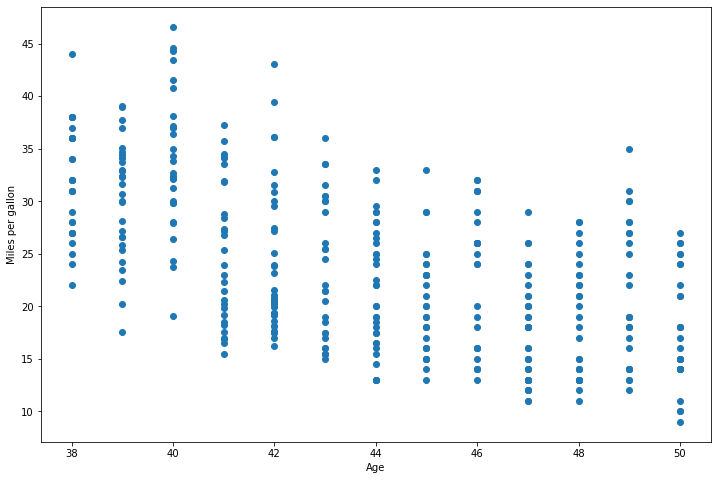

In [25]:
#plotting scatter form to understand pairwise  relationship between age and mpg
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(automobile_data['age'],automobile_data['mpg'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

###### we can see from the plot there is a definite downword trade it doesn't necessarly mean a realationship does exist 
###### but this visualization tend to tell us that older cars have lower milege 
###### in the same way we explore pair wise relation ship between deffirent variables

Text(0, 0.5, 'Miles per gallon')

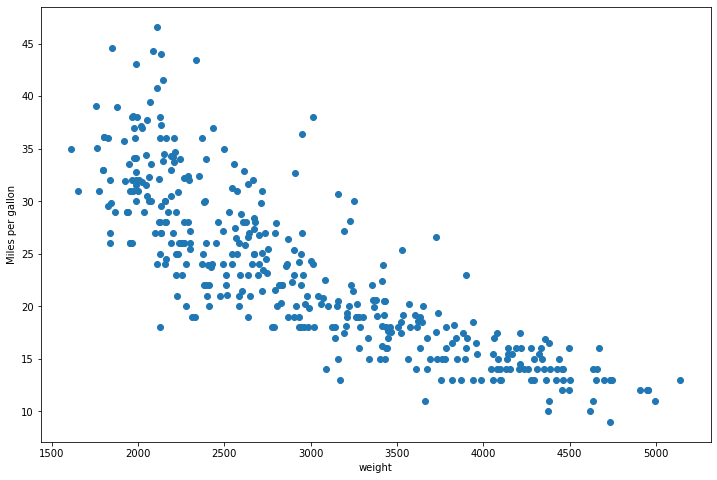

In [28]:
#plotting scatter form to understand pairwise  relationship between age and mpg
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(automobile_data['weight'],automobile_data['mpg'])

plt.xlabel('weight')
plt.ylabel('Miles per gallon')


Text(0, 0.5, 'Miles per gallon')

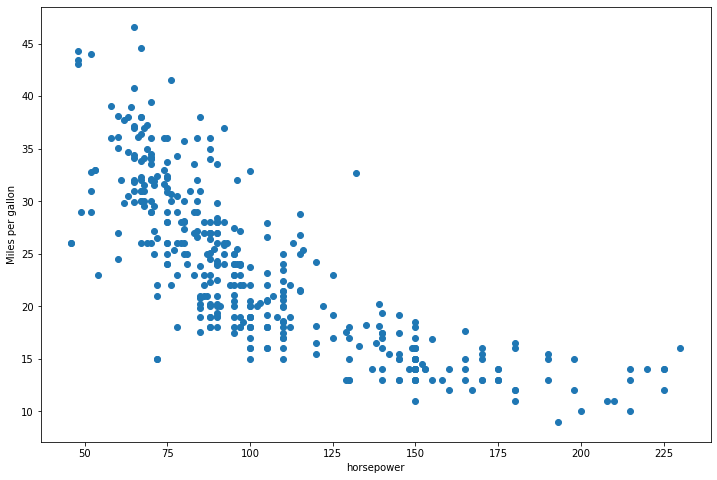

In [29]:
fig, ax = plt.subplots(figsize = (12,8))
plt.scatter(automobile_data['horsepower'],automobile_data['mpg'])

plt.xlabel('horsepower')
plt.ylabel('Miles per gallon')

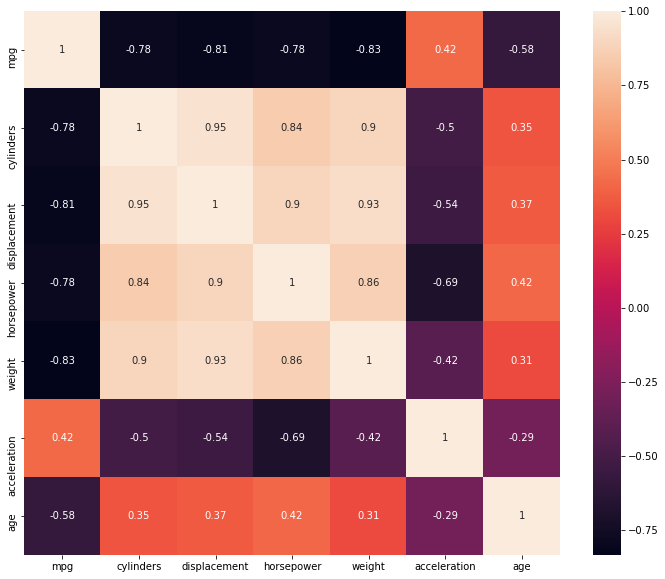

In [31]:
# construct correlation matrix 
automobile_corr = automobile_data.corr()
# view corrleation in heat map
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(automobile_corr, annot = True)

In [32]:
#shuffeling the data 
automobile_data = automobile_data.sample(frac = 1).reset_index(drop = True)
automobile_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,26.0,4,98.0,90,2265,15.5,47
1,18.0,6,232.0,100,2945,16.0,47
2,29.8,4,134.0,90,2711,15.5,40
3,27.9,4,156.0,105,2800,14.4,40
4,23.0,8,350.0,125,3900,17.4,41


In [33]:
#saving the data 
automobile_data.to_csv('automobiles/auto-mpg-processed.csv', index = False)

# I performing a simple Regression
###### using one variable 'horsepower'

In [76]:
# selecting feature and target Data 
from sklearn.model_selection import train_test_split

X = automobile_data[['horsepower']]
Y = automobile_data['mpg']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2) 

In [77]:
y_train.sample(5)

189    15.5
31     20.0
62     32.2
356    32.3
18     18.0
Name: mpg, dtype: float64

In [78]:
# building an estimator 

from sklearn.linear_model import LinearRegression # set normalize = True  scales all numeruc features to be between 0 and 1  
linear_model = LinearRegression(normalize = True).fit(x_train, y_train)

In [79]:
# measure R² 
print(" training score :", linear_model.score(x_train,y_train))

 training score : 0.6037659580108443


In [80]:
# prediction on test data 
y_pred = linear_model.predict(x_test)

In [81]:
# measure how the model performed on test data
from sklearn.metrics import r2_score
print("testing score :", r2_score(y_test, y_pred))

testing score : 0.6118347911643908


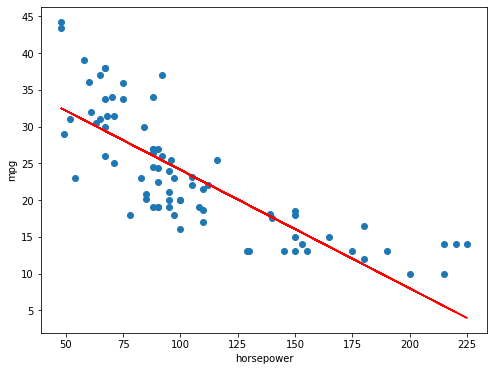

In [83]:
fig,ax = plt.subplots(figsize = (8,6))
plt.scatter(x_test, y_test)                      # we plot test data scatter form 
plt.plot(x_test, y_pred, color ='r')             # plot predicted values from our model in a red line 

plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

In [87]:
# build a nother linear model with a diffrent feature 'age'

X = automobile_data[['age']]
Y = automobile_data['mpg']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

linear_model = LinearRegression(normalize = True).fit(x_train, y_train)
print("trainig score : ", linear_model.score(x_train,y_train))
y_pred  = linear_model.predict(x_test)
print("testing score : ", r2_score(y_test,y_pred))

trainig score :  0.3245357513803473
testing score :  0.3787254562619702


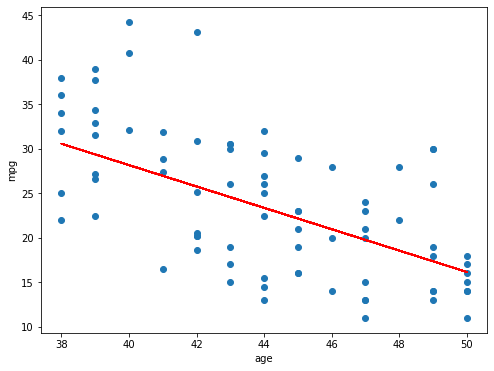

In [88]:
fig , ax  = plt.subplots(figsize = (8,6))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color ='r')

plt.xlabel('age')
plt.ylabel('mpg')
plt.show()

# performing Regression with Multiple features

In [98]:
# build a linear model with  multiple features 

X = automobile_data[['horsepower','displacement','weight','acceleration','cylinders']]
Y = automobile_data['mpg']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

linear_model = LinearRegression(normalize = True).fit(x_train, y_train)
print("trainig score : ", linear_model.score(x_train,y_train))


trainig score :  0.7279009228256417


In [99]:
# print the coefficients of our trained model (model weights)
predictors = x_train.columns 
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

cylinders      -0.560802
horsepower     -0.031302
weight         -0.005151
displacement   -0.001450
acceleration    0.060705
dtype: float64


In [101]:
#measure prediction on test data  
y_pred = linear_model.predict(x_test)
print("testing score",r2_score(y_test, y_pred))

testing score 0.6104968398136708


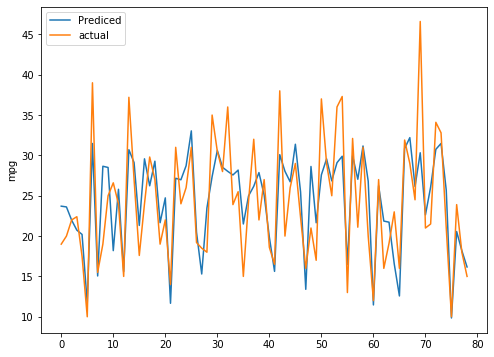

In [102]:
fig, ax = plt.subplots(figsize = (8,6))
plt.plot(y_pred, label ='Prediced')
plt.plot(y_test.values, label = 'actual')

plt.ylabel('mpg')
plt.legend()
plt.show()